# Imported Packages and Modules

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing and Feature Engineering
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder

# Models
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


import scipy.stats as stats

# Loaded dataset

In [2]:
df_test = pd.read_csv('Paitients_Files_Test.csv')
df_train = pd.read_csv('Paitients_Files_Train.csv')


# Hypothesis


1. Null hypothesis: Age is a major determinant of developing sepsis 
2. Alternate hypothesis: Developing sepsis is independent of age

# Questions

1. How many patients have the tendency of developing sepsis?
2. Which age group are more prone to developing sepsis?
3. Does having an insurance enhance patients chances of getting sepsis?
4. Is body mass directly correlated with a patients tendency to get sepsis?
5. Does the blood parameters associated with sepsis?

In [3]:
# Check the shapes 
df_test.shape, df_train.shape


((169, 10), (599, 11))

In [4]:
df_train

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [5]:
df_train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [6]:
df_test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


In [7]:
# Information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
# checking for missing values in the train dataset
df_train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [9]:
# checking for missing values in the test dataset
df_test.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [10]:
# checking for missing values in the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [11]:
# check for duplicated values
df_train.duplicated().sum()

0

In [12]:
# Statiscally overview of the dataset
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# Check of outliers by applying the IQR method checking on the train dataset
numerical_features = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
df = df_train[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()

PRG    True
PL     True
PR     True
SK     True
TS     True
M11    True
BD2    True
Age    True
dtype: bool

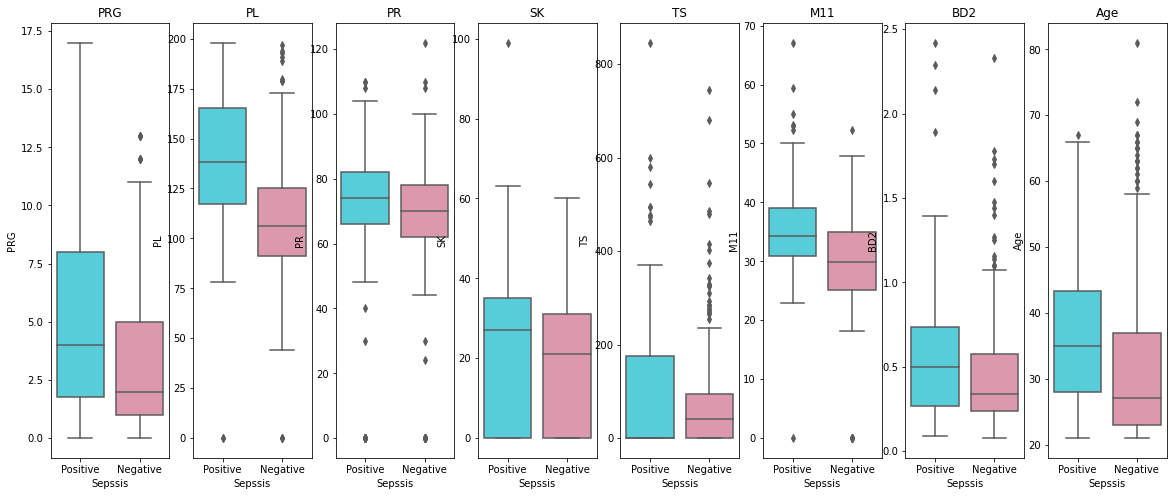

In [14]:
# box plot for checking outliers
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Sepssis']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True ]
continues_features = [x for x in all_features if x not in categorical_features]
color = ('#40DFEF', '#E78EA9')
fig, ax = plt.subplots(1, 8, figsize=(20,8))
for i, p in enumerate(continues_features) :
        sns.boxplot(data=df_train, x='Sepssis', y=p, ax=ax[i], palette= color,whis = 1.5)
        ax[i].set_title(p)



The results above demonstrate they are outliers in the numerical features

# Trim the outliers

we used trimming to remove the bad data from our dataset

In [15]:
numerical_features = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
df = df_train[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [16]:
df_trim = df_train.copy()

In [17]:
def iqr_trimming(df_train, cols, factor):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        s = df_train[col]
        
        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
    
    return drop_outliers

In [18]:
dropped = np.unique(iqr_trimming(df_trim, numerical_features, 1.5))

In [19]:
df_trim.drop(dropped, inplace=True)

In [20]:
df_trim.shape

(493, 11)

In [21]:
df_train.shape

(599, 11)

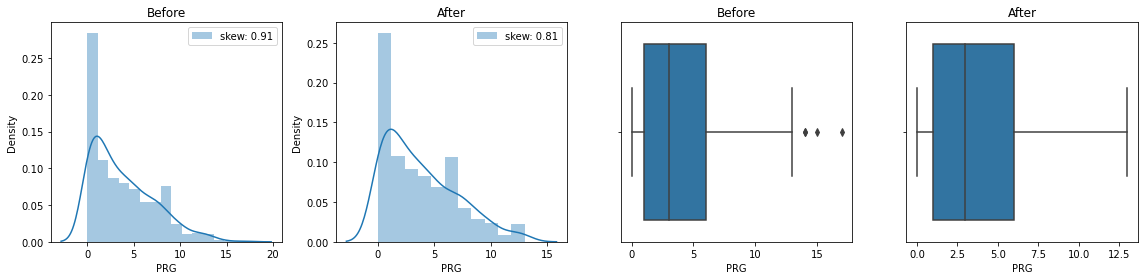

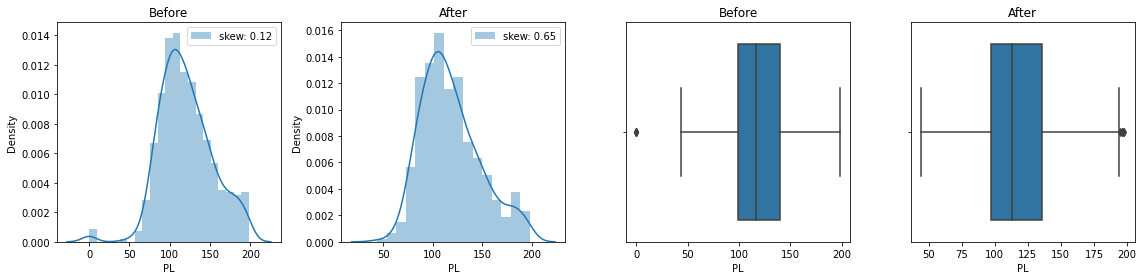

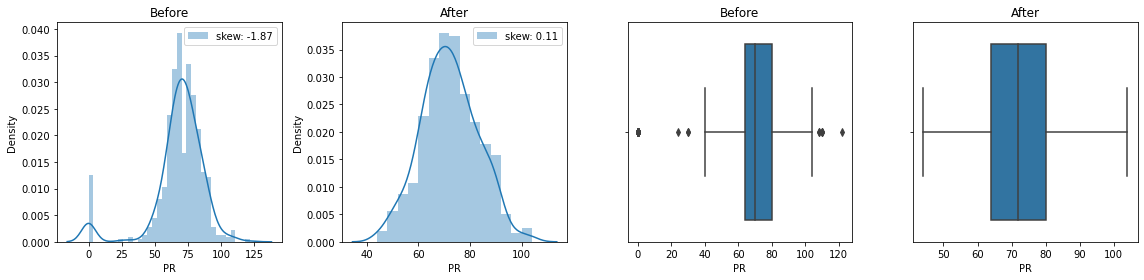

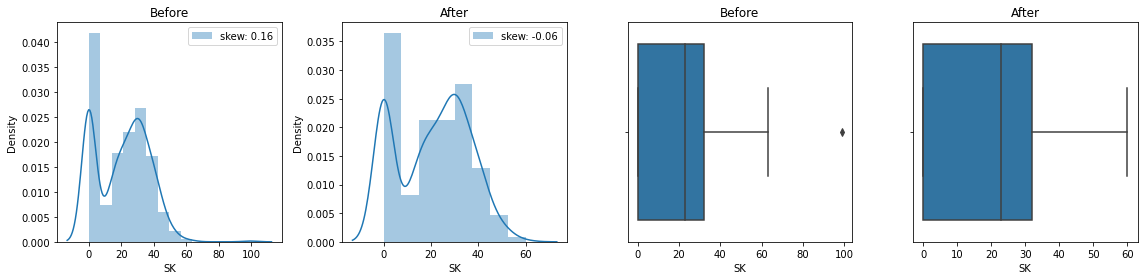

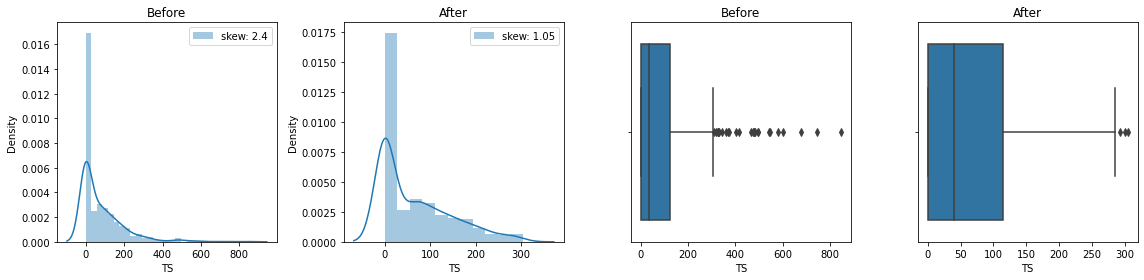

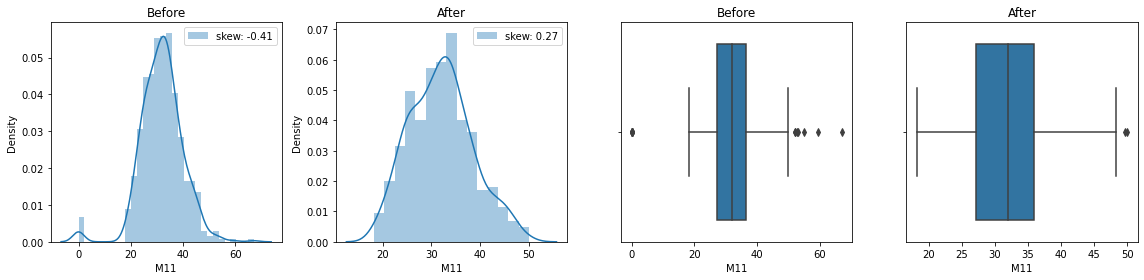

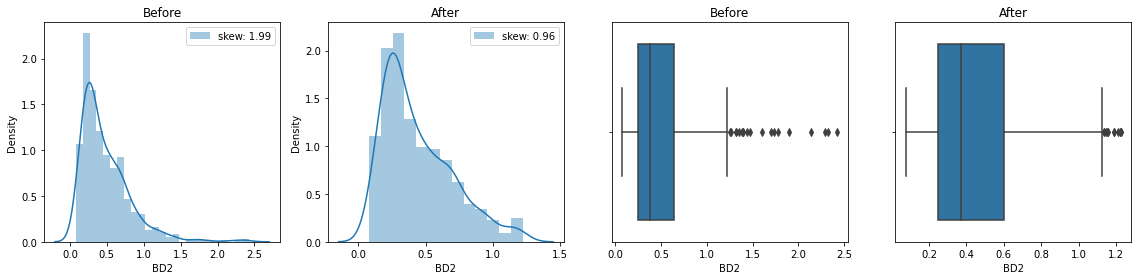

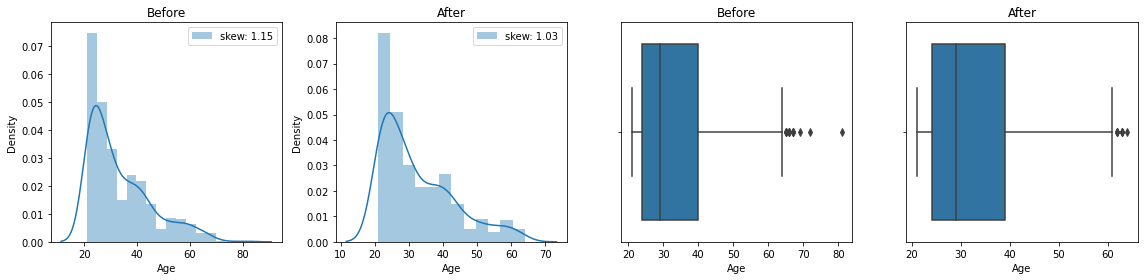

In [22]:
for col in numerical_features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_trim[col], label="skew: " + str(np.round(df_trim[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_train[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_trim[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

# Exploratory Data Analysis

# Bivariate Analysis

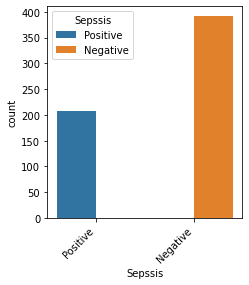

In [23]:
# Setup figure
cols = 5
rows = 4
fig = plt.figure(figsize= (15,15))

# Plotting
all_categorics = df_train.select_dtypes(include='object')
categoric_columns = all_categorics.columns[all_categorics.nunique()<5]
for i, col in enumerate(categoric_columns):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=df_train[col], hue='Sepssis', data=df_train, ax=ax)    
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()  
plt.show()

# Multivariate Analysis

<AxesSubplot:>

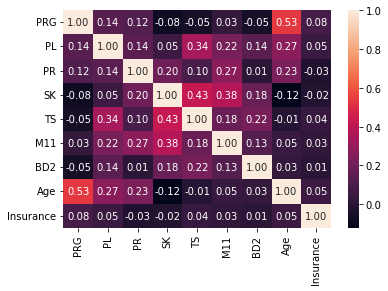

In [24]:
# correlation heatmap df
correlation = df_train.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

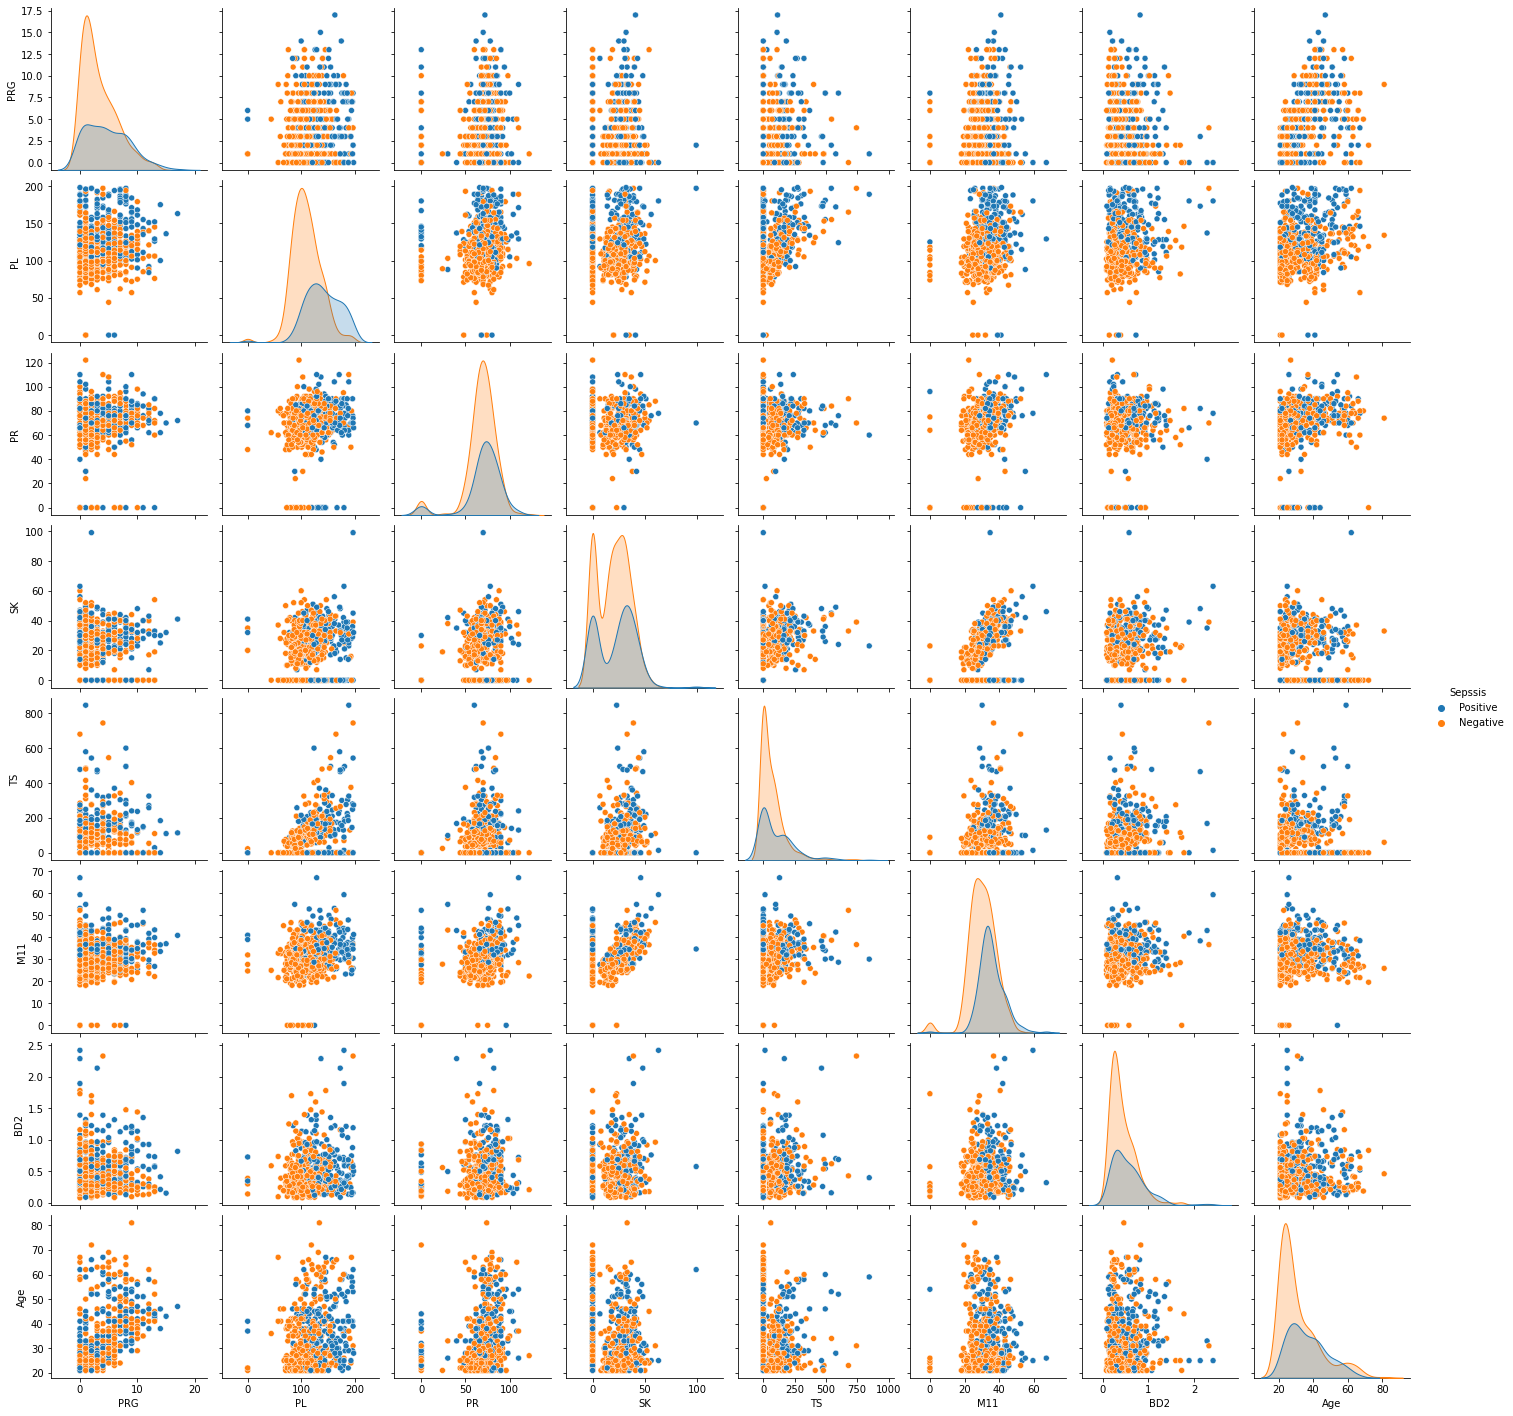

In [25]:
sns.pairplot(df_train,vars = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], hue="Sepssis")

# 1. How many patients have the tendency of developing sepsis?
208 patient have the tendency of developing sepsis

In [26]:
sep  = df_train.groupby('Sepssis', as_index=False)['ID'].count()


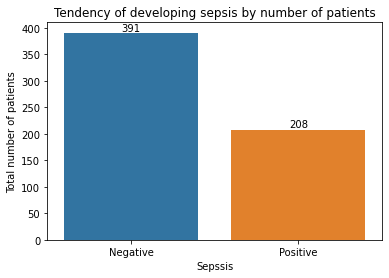

In [27]:
splot = sns.barplot(data=sep, y='ID', x='Sepssis')
plt.xlabel("Sepssis")
plt.ylabel("Total number of patients")
plt.title('Tendency of developing sepsis by number of patients')
plt.bar_label(splot.containers[0], size=10)
plt.show()

# 2.  Which age group are more prone to developing sepsis?
People between 20-30 years have higher tendency of getting sepsis.
Our Null hypothesis is therefore False and the alternate hypothesis proven true

In [28]:
#age group count of patients with sepsis

age_group = df_train[df_train.Sepssis == 'Positive'].groupby('Age', as_index=False)['ID'].count()
age_group

,Age,ID
0,21,5
1,22,6
2,23,6
3,24,6
4,25,12
5,26,6
6,27,5
7,28,10
8,29,13
9,30,5


Text(0.5, 1.0, 'Age group of patients with sepsis')

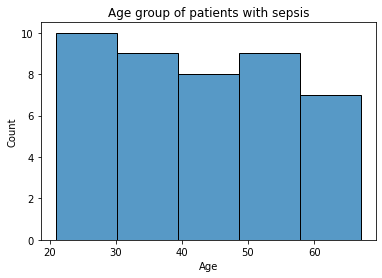

In [29]:
sns.histplot(data=age_group, x="Age", bins=5)
plt.title('Age group of patients with sepsis')

# 3. Does having an insurance enhance patients chances of getting sepsis?
No, majority of patients with insurance have no tendency of developing sepsis

Text(0.5, 1.0, 'Insurance of all patients')

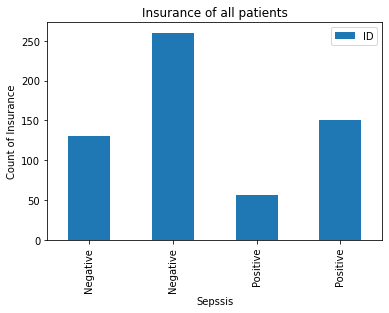

In [30]:
insured = df_train.groupby(['Sepssis', 'Insurance'], as_index=False)['ID'].count()
insured.plot(kind='bar', x='Sepssis', y='ID')
plt.ylabel('Count of Insurance')
plt.title('Insurance of all patients')

# 4. Is body mass directly correlated with a patients tendency to get sepsis?
Per the histogram used to visualize the data, majority of sepsis patient are between a body mass of 30-40. However, there are even a greater number of people with the same body mass without sepsis hence it cannot be concluded that the tendency of a patient getting sepsis is correlated with their body weight. 

In [31]:
body_mass = df_train.groupby(['Sepssis', 'M11'], as_index=False)['ID'].count()

In [32]:
hist1 = body_mass[body_mass.Sepssis == 'Positive']
hist2 = body_mass[body_mass.Sepssis == 'Negative']

Text(0.5, 1.0, 'Body mass of patient with Sepsis')

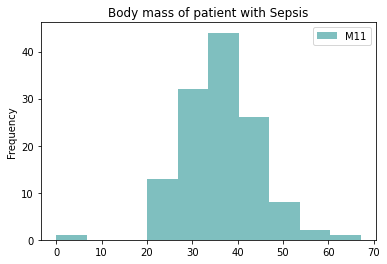

In [33]:
hist1.plot(kind='hist', column = 'M11', bins = 10, color = 'teal', \
           alpha = 0.5 )
plt.title('Body mass of patient with Sepsis')


Text(0.5, 1.0, 'Body mass of patient without Sepsis')

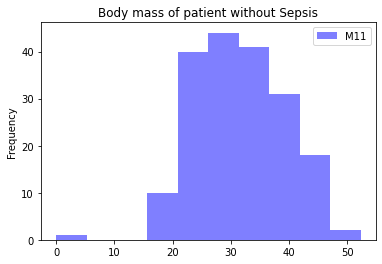

In [34]:
hist2.plot(kind='hist', column = 'M11', bins = 10, color = 'blue', \
            alpha = 0.5)
plt.title('Body mass of patient without Sepsis')

# 5. Does the blood parameters associated with sepsis?

In [ ]:
plt.figure(figsize=(12,10))

colors = ["green", "red",]
labels = ['Positive', 'Negative']
sns.set_palette(sns.color_palette(colors))

sns.kdeplot(data=df_train,x='M11',hue='Sepssis', shade = True)
plt.title('Body Mass comparison')
plt.show()

The plot below shows that blood is affected by sepssis

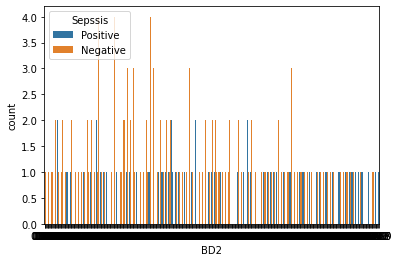

In [35]:
sns.countplot(data = df_train, 
              x = 'BD2', hue = 'Sepssis')
plt.show()

# Data preprocessing and Engineering


# Data Imbalance Check

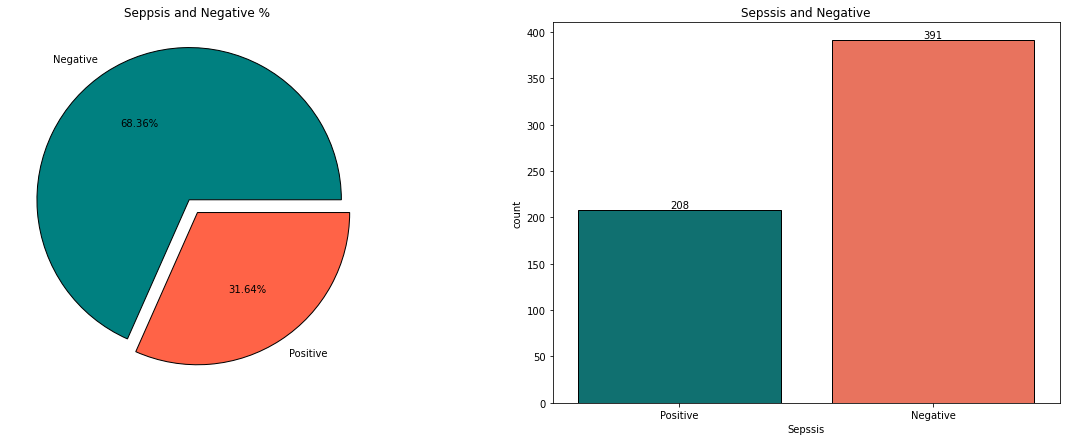

In [36]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

l1 = list(df_trim['Sepssis'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Negative','Positive'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Seppsis and Negative %');

plt.subplot(1,2,2)
ax = sns.countplot(data = df_train, 
                   x='Sepssis',
                   palette = palette, 
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Positive','Negative'])
    
plt.title('Sepssis and Negative')
plt.show()

In [37]:
categoric_columns = ['ID']
numeric_columns =  [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']



In [38]:
# Label Encoder on the target column
le = LabelEncoder()
df=df_trim
df[['Sepssis']] = df[['Sepssis']].apply(le.fit_transform) 
X = df.drop('Sepssis', axis=1)
y = df['Sepssis']

# Categorical Encoding

In [39]:
# Encode the categorical variables in the train data
# calling our encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop="first")
# setting output to DataFrame
encoder.set_output(transform="pandas")
# encoding our data
Encoded_train = encoder.fit_transform(df_trim[categoric_columns])

# Scaling

In [40]:
X = df_trim.drop('ID', axis=1) #train data

In [41]:
# Scaling on train dataset
Scaler = MinMaxScaler()
train = Scaler.fit(X).set_output(transform="pandas")
scaled_train = train.transform(X)

In [42]:
# join the scaled and encoded data
train_data = pd.concat([scaled_train, Encoded_train], axis=1)


In [43]:
#Resampling the minority of the target variable using smote
X = train_data.drop(columns=["Sepssis"])
y = train_data["Sepssis"]

smote = SMOTE(sampling_strategy="minority")
X, y = smote.fit_resample(X, y)
y.value_counts()

1.0    337
0.0    337
Name: Sepssis, dtype: int64

In [44]:
# Split the dataframe into train and eval
X_train, X_eval, y_train, y_eval=train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# Model Building

In [45]:

# Define the models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
SVC_model = SVC()
KNN_model =  KNeighborsClassifier()



# Fit the models
logreg = logreg_model.fit(X_train, y_train)
rf = rf_model.fit(X_train, y_train)
gb = gb_model.fit(X_train, y_train)
SVC = SVC_model.fit(X_train, y_train)
KNN = KNN_model.fit(X_train,y_train)


# Make predictions
logreg_preds = logreg.predict(X_eval)
rf_preds = rf.predict(X_eval)
gb_preds = gb.predict(X_eval)
SVC_preds = SVC.predict(X_eval)
KNN_preds = KNN.predict(X_eval)



# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_eval, logreg_preds)
rf_accuracy = accuracy_score(y_eval, rf_preds)
gb_accuracy = accuracy_score(y_eval, gb_preds)
SVC_accuracy = accuracy_score(y_eval, SVC_preds)
KNN_accuracy = accuracy_score(y_eval, KNN_preds)


logreg_precision = precision_score(y_eval, logreg_preds)
rf_precision = precision_score(y_eval, rf_preds)
gb_precision = precision_score(y_eval, gb_preds)
SVC_precision = precision_score(y_eval, SVC_preds)
KNN_precision = precision_score(y_eval, KNN_preds)


logreg_recall = recall_score(y_eval, logreg_preds)
rf_recall = recall_score(y_eval, rf_preds)
gb_recall = recall_score(y_eval, gb_preds)
SVC_recall = recall_score(y_eval, SVC_preds)
KNN_recall = recall_score(y_eval, KNN_preds)


logreg_f1 = f1_score(y_eval, logreg_preds)
rf_f1 = f1_score(y_eval, rf_preds)
gb_f1 = f1_score(y_eval, gb_preds)
SVC_f1 = f1_score(y_eval, SVC_preds)
KNN_f1 = f1_score(y_eval, KNN_preds)


logreg_roc_auc = roc_auc_score(y_eval, logreg_preds)
rf_roc_auc = roc_auc_score(y_eval, rf_preds)
gb_roc_auc = roc_auc_score(y_eval, gb_preds)
SVC_roc_auc = roc_auc_score(y_eval, SVC_preds)
KNN_roc_auc = roc_auc_score(y_eval, KNN_preds)



# Print evaluation metrics
print("Logistic Regression:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-score:", logreg_f1)
print("ROC-AUC:", logreg_roc_auc)
print()

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("ROC-AUC:", rf_roc_auc)
print()

print("Gradient Boosting:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1-score:", gb_f1)
print("ROC-AUC:", gb_roc_auc)
print()

print("Support Vector Machine:")
print("Accuracy:", SVC_accuracy)
print("Precision:", SVC_precision)
print("Recall:", SVC_recall)
print("F1-score:", SVC_f1)
print("ROC-AUC:", SVC_roc_auc)
print()


print("KNeighborsClassifier:")
print("Accuracy:", KNN_accuracy)
print("Precision:", KNN_precision)
print("Recall:", KNN_recall)
print("F1-score:", KNN_f1)
print("ROC-AUC:", KNN_roc_auc)
print()








Logistic Regression:
Accuracy: 0.8814814814814815
Precision: 0.8695652173913043
Recall: 0.8955223880597015
F1-score: 0.8823529411764706
ROC-AUC: 0.8815847234416154

Random Forest:
Accuracy: 0.9185185185185185
Precision: 0.9
Recall: 0.9402985074626866
F1-score: 0.9197080291970803
ROC-AUC: 0.9186786654960493

Gradient Boosting:
Accuracy: 0.8666666666666667
Precision: 0.8656716417910447
Recall: 0.8656716417910447
F1-score: 0.8656716417910447
ROC-AUC: 0.866659350307287

Support Vector Machine:
Accuracy: 0.9333333333333333
Precision: 0.9393939393939394
Recall: 0.9253731343283582
F1-score: 0.9323308270676692
ROC-AUC: 0.9332748024582967

KNeighborsClassifier:
Accuracy: 0.4962962962962963
Precision: 0.4962962962962963
Recall: 1.0
F1-score: 0.6633663366336634
ROC-AUC: 0.5



In [46]:
compare_models = ['Logistic Regression','Random forest','Gradient Boosting','Support Vector Machines','KNearestNeighborsClassifier']

data={'Accuracy':[logreg_accuracy,rf_accuracy,gb_accuracy,SVC_accuracy,KNN_accuracy],
      'Recall':[logreg_recall,rf_recall,gb_recall,SVC_recall,KNN_recall],
      'Precision':[logreg_precision,rf_precision,gb_precision,SVC_precision,KNN_precision], 
      'f1_score':[logreg_f1,rf_f1,gb_f1,SVC_f1,KNN_f1],
      'ROC_AUC':[logreg_roc_auc,rf_roc_auc,gb_roc_auc,SVC_roc_auc,KNN_roc_auc],
      'Description':['','','','best model','']}
result= pd.DataFrame(data=data, index=compare_models)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC,Description
Logistic Regression,0.881481,0.895522,0.869565,0.882353,0.881585,
Random forest,0.918519,0.940299,0.900000,0.919708,0.918679,
Gradient Boosting,0.866667,0.865672,0.865672,0.865672,0.866659,
Support Vector Machines,0.933333,0.925373,0.939394,0.932331,0.933275,best model
KNearestNeighborsClassifier,0.496296,1.000000,0.496296,0.663366,0.500000,


In [47]:
# Hyperparameter Tuninng For the best model
# create param grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]}


# make  GridSearchCV object
grid = GridSearchCV(SVC_model,
                    param_grid,
                    cv = 10,
                    refit=True,verbose=2,scoring = 'f1')
grid.fit(X_train,y_train)

#Print the parameters
print(grid.best_estimator_)

grid_predictions = grid.predict(X_eval)

# performance evaluation on test data
print(classification_report(y_eval,grid_predictions))


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=

[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ..................................C=10, gamma=0.001; total time=   0.0s
[CV] END ..................................C=10, gamma=0.001; total time=   0.0s
[CV] END ..................................C=10, gamma=0.001; total time=   0.0s
[CV] END ...................

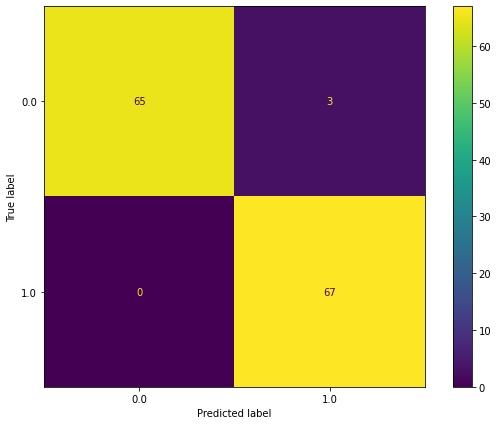

In [48]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
y_pred_SVC = grid.best_estimator_.predict(X_eval)

cm = confusion_matrix(y_eval, y_pred_SVC, labels=grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [49]:
# Creating a dictionary of objects to export
